In [1]:
from functies import *
from classes import *
import sympy as sp
import numpy as np

In [2]:
def snelheidsmodel_pseudosnelheid(t, parameters):
    c_0, k, orde = parameters
    '''
    c_0 = beginconcentratie
    k = pseudosnelheidsconstante
    orde = orde van de reactie
    '''
    if c_0 < 0 or k < 0:
        return np.full(np.shape(t), np.inf)
    if orde == 1:
        c = c_0 * np.exp(-k*t)
    else:
        c = (c_0**(1-orde) - k*(1-orde)*t)**(1/(1-orde))
    return c

def snelheidsmodel_1eorde(t,parameters):
    c_0, k = parameters
    return c_0 * np.exp(-k*t)

def snelheidsmodel_0eorde(t,params):
    c_0, k = params
    return c_0 - k*t



In [29]:
#prepareer de data van de eerste set metingen
absorbanties_set_1 = []
tijd_0 = (10,56)
tijden_set_1 = []
for i in range(36): #alle meetpunten afgaan --let op! het is 0.06, niet 0.006!
    adres = "C:/Users/User/Documents/Cas/Unif/2e can/experimentele/week 12 chemie I/NaOH0.006/NaOH0.006_Absorbance__"+str(i)+'__'+str(i)+'.txt'
    file = open(adres, 'rt')
    tekst = file.read();file.close()
    tekst = tekst.split('590,095	')
    meting = float(tekst[1][:8].replace(',','.'))
    absorbanties_set_1.append(meting)
    
    datum = tekst[0].split('Mon Dec 09 11:')[1][:5]
    minuut = int(datum[:2]);seconde = int(datum[3:])

    tijdsverschil = (minuut-tijd_0[0])*60 + (seconde-tijd_0[1])
    tijden_set_1.append(tijdsverschil)

absorbanties_set_1 = np.array(absorbanties_set_1)
tijden_set_1 = np.array(tijden_set_1)
print(np.shape(absorbanties_set_1))
print(np.shape(tijden_set_1))

epsilon = 87000 #M^-1 cm^-1
l = 1 #cm
concentraties_set_1 = -1*absorbanties_set_1/(epsilon*l)

#de data van de Bulgaar/Indiër

data_1=np.array([0.6777,0.61495,0.55706,0.50277,0.45396,0.4072,0.36515,0.32651,0.2922,0.26294,0.23723,0.21136,0.18762,0.16799,0.14923,0.13225,0.11662,0.10335])
data_2=np.array([0.75223,0.71715,0.68048,0.6455,0.61031,0.57533,0.54337,0.51178,0.48297,0.45412,0.4277,0.40186,0.37751,0.3522,0.32759,0.30677,0.28685,0.26855,0.25045])
concentraties_set_1 = data_1
tijden_set_1 = np.array([20*i for i in range(len(data_1))])

fouten_set_1 = 0.02*concentraties_set_1


(36,)
(36,)


Raw output
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 87051.99726564012
        x: [ 9.600e-06  2.100e-08  1.000e+00]
      nit: 0
      jac: [ 3.218e+10 -8.651e+07 -9.377e+04]
 hess_inv: [[1 0 0]
            [0 1 0]
            [0 0 1]]
     nfev: 24
     njev: 3
[[4.8e-06, 9.600109130414784e-06], [1.05e-08, 3.15e-08], [3.560450310057396, 28.884312560034726]]
##############help######################"
['c_0', 'k', 'orde']
[[4.8e-06, 9.600109130414784e-06], [1.05e-08, 3.15e-08], [3.560450310057396, 28.884312560034726]]
[9.6e-06 2.1e-08 1.0e+00]
###########################################
c_0 heeft als waarde: 9.6e-06 + 1.0913e-10 - 4.8e-06 met 68% betrouwbaarheidsinterval: [4.8e-06, 9.6001e-06] 
k heeft als waarde: 2.1e-08 + 1.05e-08 - 1.05e-08 met 68% betrouwbaarheidsinterval: [1.05e-08, 3.15e-08] 
orde heeft als waarde: 1 + 27.884 - -2.5605 met 68% betrouwbaarheidsinterval: [3.5605, 28.884] 
De p-waarde voor de hyp

c:\Users\User\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
c:\Users\User\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


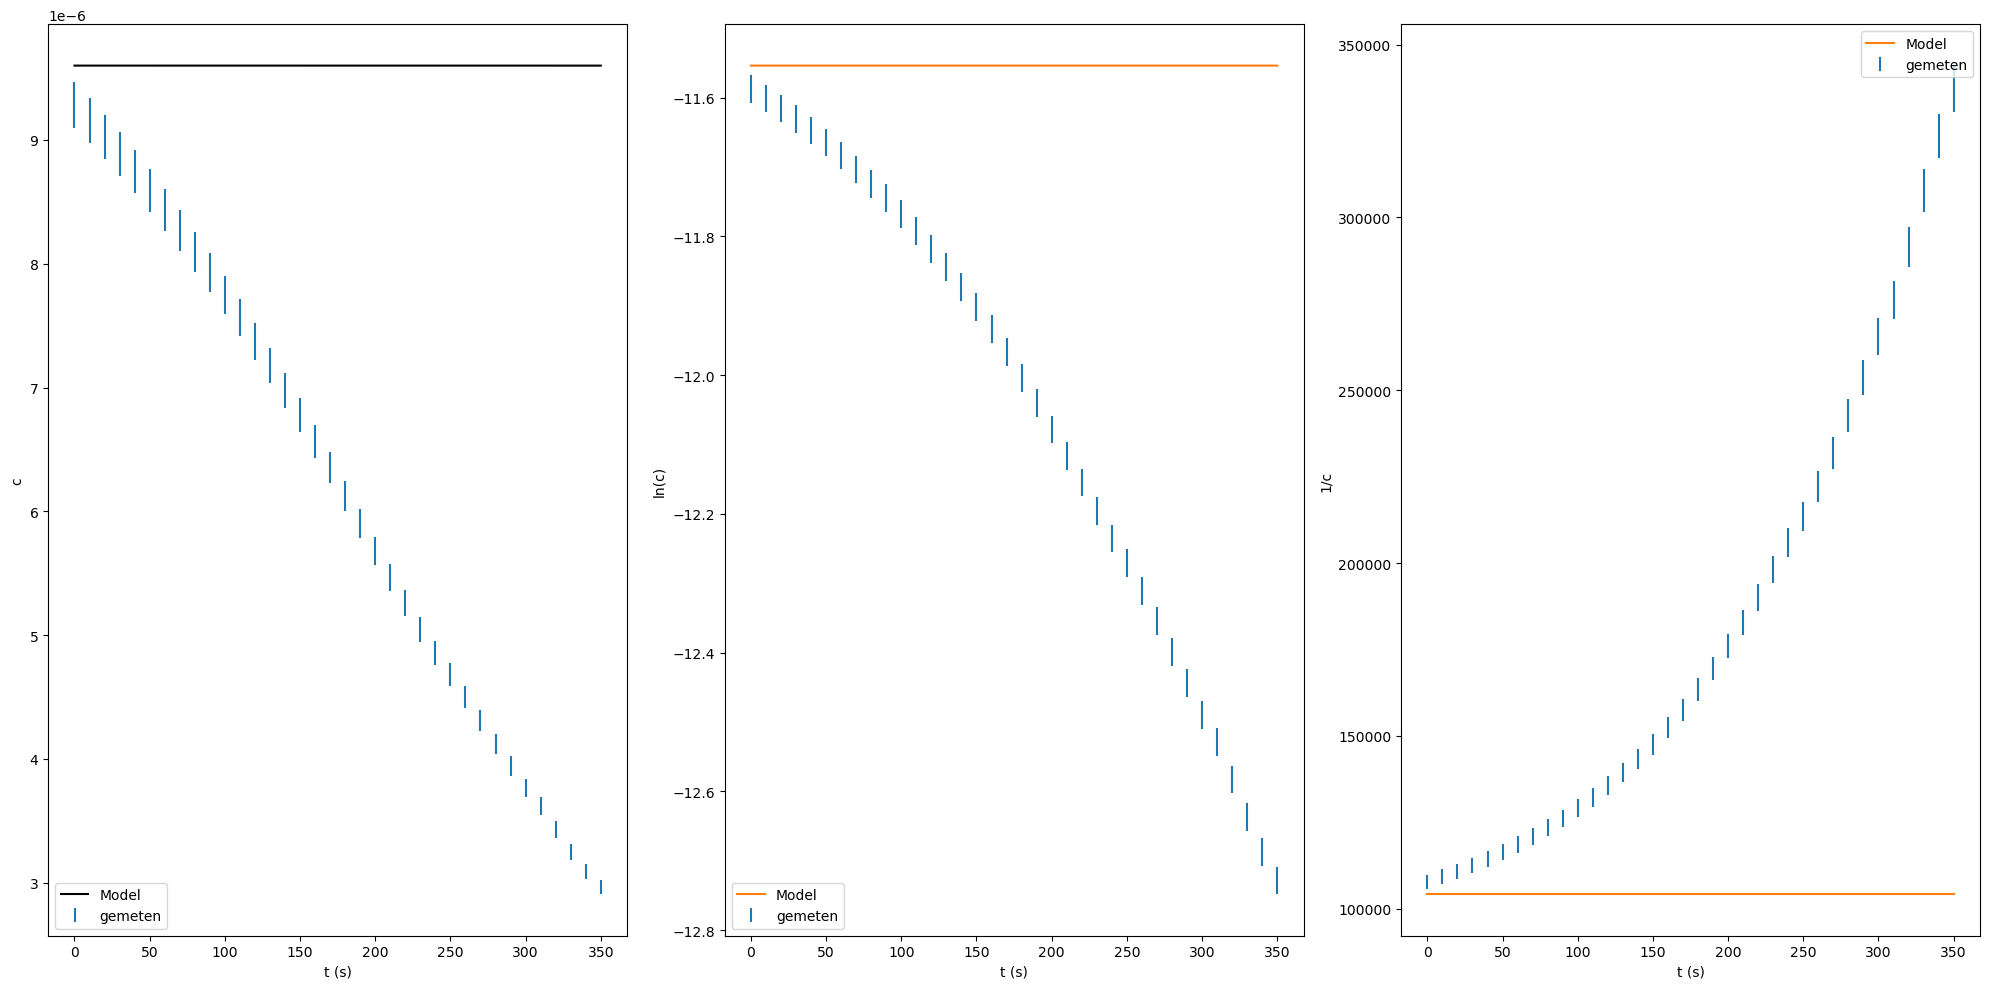

In [22]:
# eerste set metingen: we gokken de orde
def initial_vals(x,y):
    return [0.96e-5,2.1e-8, 1]

parameters = ['c_0', 'k', 'orde']
outp = fit(parameters, snelheidsmodel_pseudosnelheid, initial_vals, tijden_set_1, concentraties_set_1, fouten_set_1)
print(outp)
parameterwaarden = [fitwaarde[0] for fitwaarde in outp]


fig,ax = plt.subplots(1,3, figsize = (20,10))
ax[0].errorbar(tijden_set_1,concentraties_set_1,linestyle = '', label = 'gemeten', yerr = fouten_set_1)
ax[1].errorbar(tijden_set_1,np.log(concentraties_set_1), linestyle = '', label = 'gemeten', yerr = fouten_set_1/concentraties_set_1)
ax[2].errorbar(tijden_set_1,1/concentraties_set_1, linestyle = '', label = 'gemeten', yerr = fouten_set_1/concentraties_set_1**2)
ax[0].set_ylabel('c')
ax[1].set_ylabel('ln(c)')
ax[2].set_ylabel('1/c')
t = np.linspace(0,350)
ax[0].plot(t, snelheidsmodel_pseudosnelheid(t, parameterwaarden),color = 'black',label = 'Model')
ax[1].plot(t, np.log(snelheidsmodel_pseudosnelheid(t, parameterwaarden)),label = 'Model')
ax[2].plot(t, 1/snelheidsmodel_pseudosnelheid(t, parameterwaarden),label = 'Model')
for i in range(3):
    ax[i].set_xlabel('t (s)')
    ax[i].legend()
plt.tight_layout();plt.show()

Raw output
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 30.331916826333945
        x: [ 9.600e-06  1.913e-08]
      nit: 1
      jac: [ 4.203e+08  3.391e+12]
 hess_inv: [[ 1.000e+00  3.557e-03]
            [ 3.557e-03  1.265e-05]]
     nfev: 99
     njev: 29
[[9.484660585056136e-06, 9.60584941926078e-06], [1.9107884471812222e-08, 1.952184238180708e-08]]
##############help######################"
['c_0', 'k']
[[9.484660585056136e-06, 9.60584941926078e-06], [1.9107884471812222e-08, 1.952184238180708e-08]]
[9.60000117e-06 1.91330069e-08]
###########################################
c_0 heeft als waarde: 9.6e-06 + 5.8482e-09 - 1.1534e-07 met 68% betrouwbaarheidsinterval: [9.4847e-06, 9.6058e-06] 
k heeft als waarde: 1.9133e-08 + 3.8884e-10 - 2.5122e-11 met 68% betrouwbaarheidsinterval: [1.9108e-08, 1.9522e-08] 
De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: 0.6481
De gereduceerde chi^2 waard

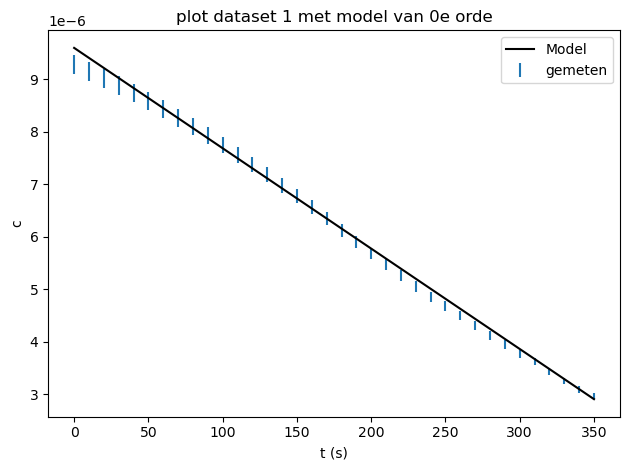

In [23]:
#we zien duidelijk dat het geen 2e orde is dus dat gooien we al weg
# eerste set metingen 0e orde
def initial_vals(x,y):
    return [0.96e-5,2.1e-8]


parameters = ['c_0', 'k']
outp = fit(parameters, snelheidsmodel_0eorde, initial_vals, tijden_set_1, concentraties_set_1, fouten_set_1)
parameterwaarden = [fitwaarde[0] for fitwaarde in outp]


fig,ax = plt.subplots(1,1)
ax.errorbar(tijden_set_1,concentraties_set_1,linestyle = '', label = 'gemeten', yerr = fouten_set_1)
ax.set_ylabel('c')
t = np.linspace(0,350)
ax.plot(t, snelheidsmodel_0eorde(t, parameterwaarden),color = 'black',label = 'Model')
ax.set_title('plot dataset 1 met model van 0e orde')
ax.set_xlabel('t (s)')
ax.legend()
plt.tight_layout();plt.show()


Raw output
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 13.034618565525863
        x: [ 7.003e-01  5.528e-03]
      nit: 13
      jac: [ 3.576e-07 -9.239e-05]
 hess_inv: [[ 1.944e-05  1.175e-07]
            [ 1.175e-07  9.870e-10]]
     nfev: 183
     njev: 61
[[0.6952680051038511, 0.705235834437126], [0.005493109596151668, 0.005564154999640593]]
##############help######################"
['c_0', 'k']
[[0.6952680051038511, 0.705235834437126], [0.005493109596151668, 0.005564154999640593]]
[0.70025191 0.00552846]
###########################################
c_0 heeft als waarde: 0.70025 + 0.0049839 - 0.0049839 met 68% betrouwbaarheidsinterval: [0.69527, 0.70524] 
k heeft als waarde: 0.0055285 + 3.5697e-05 - 3.5349e-05 met 68% betrouwbaarheidsinterval: [0.0054931, 0.0055642] 
De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: 0.67022
De gereduceerde chi^2 waarde is: 0.81466
[[0.7002519123227708

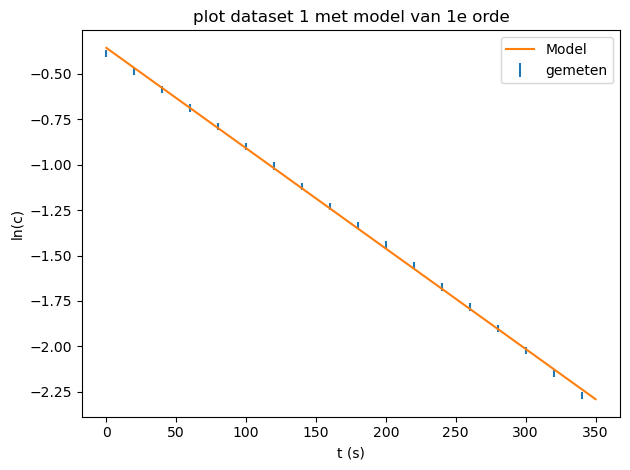

In [30]:
# eerste set metingen: 1e orde
def initial_vals(x,y):
    return [0.96e-5,2.1e-8]

parameters = ['c_0', 'k']
outp = fit(parameters, snelheidsmodel_1eorde, initial_vals, tijden_set_1, concentraties_set_1, fouten_set_1)
print(outp)
parameterwaarden = [fitwaarde[0] for fitwaarde in outp]


fig,ax = plt.subplots(1,1)
ax.errorbar(tijden_set_1,np.log(concentraties_set_1), linestyle = '', label = 'gemeten', yerr = fouten_set_1/concentraties_set_1)
ax.set_ylabel('ln(c)')
t = np.linspace(0,350)
ax.plot(t, np.log(snelheidsmodel_1eorde(t, parameterwaarden)),label = 'Model')
ax.set_title('plot dataset 1 met model van 1e orde')
ax.set_xlabel('t (s)')
ax.legend()
plt.tight_layout();plt.show()

In [25]:
#prepareer de data van de tweede set metingen
absorbanties_set_2 = []
tijd_0 = (26,16)
tijden_set_2 = []
for i in range(36): #alle meetpunten afgaan --let op! het is 0.06, niet 0.006!
    if i >= 10:
        numstring = str(i)
    else:
        numstring = '0'+str(i)
    adres = "C:/Users/User/Documents/Cas/Unif/2e can/experimentele/week 12 chemie I/NaOH0.03/0.03MnaOh_Absorbance__"+str(i)+'__000'+numstring+'.txt'
    file = open(adres, 'rt')
    tekst = file.read();file.close()
    tekst = tekst.split('590,095	')

    meting = float(tekst[1][:6].replace(',','.'))
    absorbanties_set_2.append(meting)
    
    datum = tekst[0].split('Mon Dec 09 11:')[1][:5]
    minuut = int(datum[:2]);seconde = int(datum[3:])

    tijdsverschil = (minuut-tijd_0[0])*60 + (seconde-tijd_0[1])
    tijden_set_2.append(tijdsverschil)

absorbanties_set_2 = np.array(absorbanties_set_2)[::2]
tijden_set_2 = np.array(tijden_set_2)[::2]
print(absorbanties_set_2)
print(tijden_set_2)

epsilon = 87000 #M^-1 cm^-1
l = 1 #cm
concentraties_set_2 = absorbanties_set_2/(epsilon*l)
tijden_set_2 = tijden_set_2

fouten_set_2  = 0.02*concentraties_set_2 

[0.9762 0.9247 0.8751 0.827  0.7809 0.7382 0.695  0.6554 0.6181 0.5816
 0.5461 0.5104 0.4771 0.4489 0.4186 0.3895 0.3612 0.3372]
[  0  20  39  59  80  99 119 139 159 179 199 219 239 260 279 299 320 339]


Raw output
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 89.17371973570793
        x: [ 1.087e-05  2.100e-08  0.000e+00]
      nit: 0
      jac: [ 4.427e+08  1.045e+12  2.049e+04]
 hess_inv: [[1 0 0]
            [0 1 0]
            [0 0 1]]
     nfev: 24
     njev: 3
[[1.0509821673943114e-05, 1.0878070360487808e-05], [2.095960482777816e-08, 2.2145607054323067e-08], [0.0001651140201637733, 0.0001651140201637733]]
##############help######################"
['c_0', 'k', 'orde']
[[1.0509821673943114e-05, 1.0878070360487808e-05], [2.095960482777816e-08, 2.2145607054323067e-08], [0.0001651140201637733, 0.0001651140201637733]]
[1.087e-05 2.100e-08 0.000e+00]
###########################################
c_0 heeft als waarde: 1.087e-05 + 8.0704e-09 - 3.6018e-07 met 68% betrouwbaarheidsinterval: [1.051e-05, 1.0878e-05] 
k heeft als waarde: 2.1e-08 + 1.1456e-09 - 4.0395e-11 met 68% betrouwbaarheidsinterval: [2.096e-08, 2.2146e-08] 

c:\Users\User\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


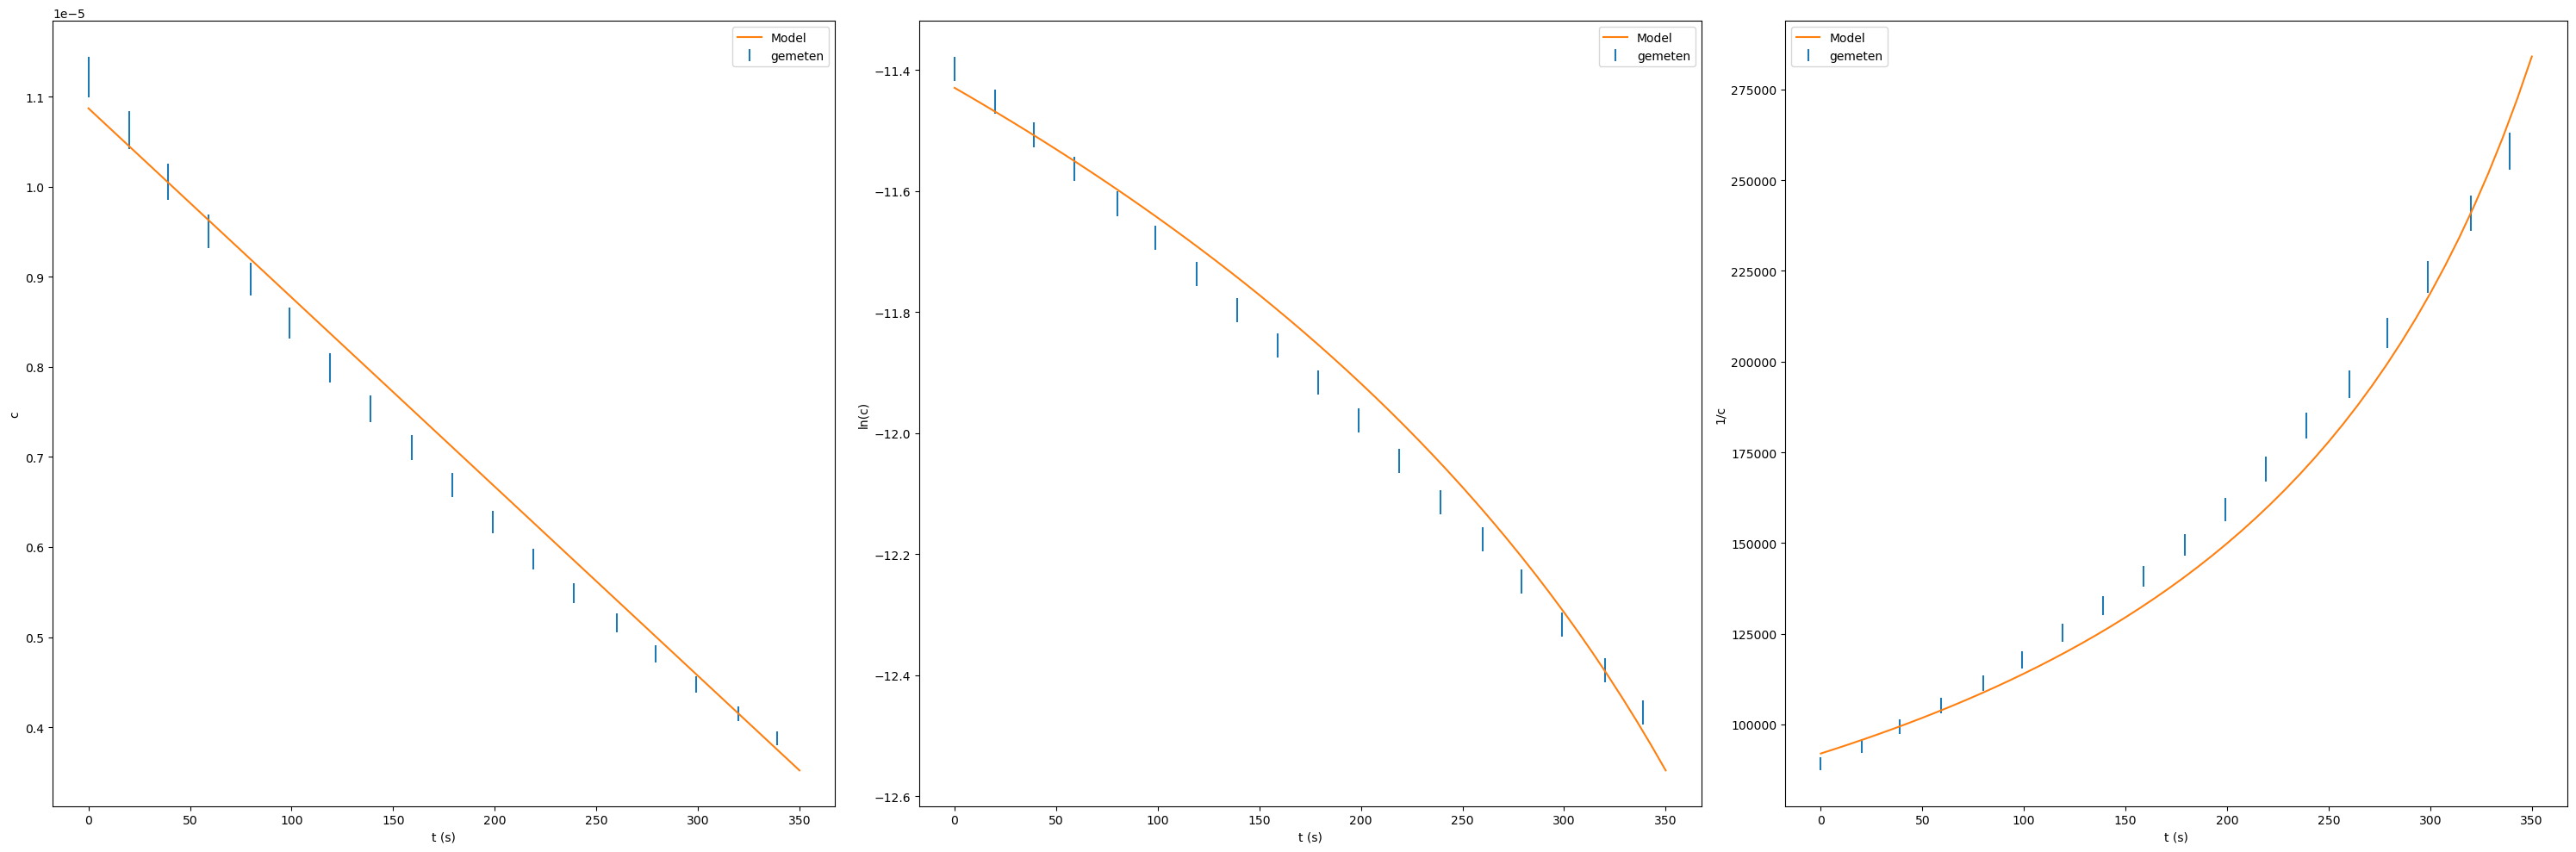

In [26]:
# tweede set metingen: we bepalen de orde
def initial_vals(x,y):
    return [1.087e-5,2.1e-8, 0]


parameters = ['c_0', 'k', 'orde']
outp = fit(parameters, snelheidsmodel_pseudosnelheid, initial_vals, tijden_set_2, concentraties_set_2 , fouten_set_2 )
parameterwaarden = [fitwaarde[0] for fitwaarde in outp]

fig,ax = plt.subplots(1,3, figsize = (30,10))
ax[0].errorbar(tijden_set_2,concentraties_set_2 ,linestyle = '', label = 'gemeten', yerr = fouten_set_2 )
ax[1].errorbar(tijden_set_2,np.log(concentraties_set_2 ),linestyle = '', label = 'gemeten', yerr = fouten_set_2 /concentraties_set_2 )
ax[2].errorbar(tijden_set_2,1/concentraties_set_2 ,linestyle = '', label = 'gemeten', yerr = fouten_set_2 /(concentraties_set_2 **2))
ax[0].set_ylabel('c')
ax[1].set_ylabel('ln(c)')
ax[2].set_ylabel('1/c')
t = np.linspace(0,350)
ax[0].plot(t, snelheidsmodel_pseudosnelheid(t, parameterwaarden),label = 'Model')
ax[1].plot(t, np.log(snelheidsmodel_pseudosnelheid(t, parameterwaarden)),label = 'Model')
ax[2].plot(t, 1/snelheidsmodel_pseudosnelheid(t, parameterwaarden),label = 'Model')
for i in range(3):
    ax[i].set_xlabel('t (s)')
    ax[i].legend()
plt.tight_layout();plt.show()

Raw output
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 89.17371973570793
        x: [ 1.087e-05  2.100e-08]
      nit: 0
      jac: [ 4.427e+08  1.045e+12]
 hess_inv: [[1 0]
            [0 1]]
     nfev: 153
     njev: 47
[[1.051260533783288e-05, 1.0875286696597457e-05], [2.0973422061089003e-08, 2.2131789821013086e-08]]
##############help######################"
['c_0', 'k']
[[1.051260533783288e-05, 1.0875286696597457e-05], [2.0973422061089003e-08, 2.2131789821013086e-08]]
[1.087e-05 2.100e-08]
###########################################
c_0 heeft als waarde: 1.087e-05 + 5.2867e-09 - 3.5739e-07 met 68% betrouwbaarheidsinterval: [1.0513e-05, 1.0875e-05] 
k heeft als waarde: 2.1e-08 + 1.1318e-09 - 2.6578e-11 met 68% betrouwbaarheidsinterval: [2.0973e-08, 2.2132e-08] 
De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: 3.5509e-12
De gereduceerde chi^2 waarde is: 5.5734


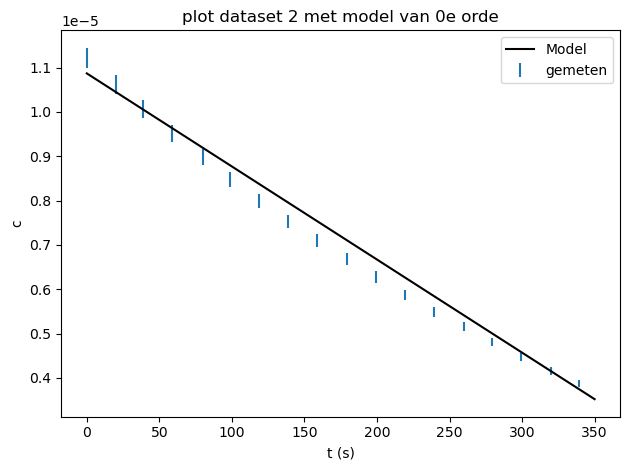

In [27]:
# tweede set metingen: 0e orde en 1e orde want we zien duidelijk dat het geen tweede orde is
#0e orde
def initial_vals(x,y):
    return [1.087e-5,2.1e-8]


parameters = ['c_0', 'k']
outp = fit(parameters, snelheidsmodel_0eorde, initial_vals, tijden_set_2, concentraties_set_2 , fouten_set_2 )
parameterwaarden = [fitwaarde[0] for fitwaarde in outp]
fig,ax = plt.subplots(1,1)
ax.errorbar(tijden_set_2,concentraties_set_2 ,linestyle = '', label = 'gemeten', yerr = fouten_set_2 )
ax.set_ylabel('c')
t = np.linspace(0,350)
ax.plot(t, snelheidsmodel_0eorde(t, parameterwaarden),color = 'black',label = 'Model')
ax.set_xlabel('t (s)')
ax.set_title('plot dataset 2 met model van 0e orde')
ax.legend()
plt.tight_layout();plt.show()

Raw output
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 9.048921043272204
        x: [ 1.145e-05  3.110e-03]
      nit: 9
      jac: [-5.995e+05  1.862e+03]
 hess_inv: [[ 4.941e-15  1.793e-12]
            [ 1.793e-12  9.232e-10]]
     nfev: 165
     njev: 51
[[1.1377961890586147e-05, 1.154193040517573e-05], [0.003073690443230673, 0.003145017760929421]]
##############help######################"
['c_0', 'k']
[[1.1377961890586147e-05, 1.154193040517573e-05], [0.003073690443230673, 0.003145017760929421]]
[1.14516206e-05 3.10969895e-03]
###########################################
c_0 heeft als waarde: 1.1452e-05 + 9.031e-08 - 7.3659e-08 met 68% betrouwbaarheidsinterval: [1.1378e-05, 1.1542e-05] 
k heeft als waarde: 0.0031097 + 3.5319e-05 - 3.6009e-05 met 68% betrouwbaarheidsinterval: [0.0030737, 0.003145] 
De p-waarde voor de hypothese test dat het model zinvol is, wordt gegeven door: 0.91139
De gereduceerde chi^2 waarde i

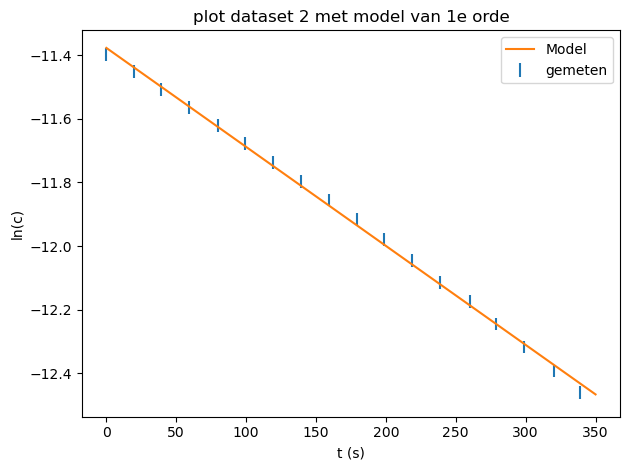

In [28]:
# tweede set metingen: 0e orde
def initial_vals(x,y):
    return [1.087e-5,2.1e-8]


parameters = ['c_0', 'k']
outp = fit(parameters, snelheidsmodel_1eorde, initial_vals, tijden_set_2, concentraties_set_2 , fouten_set_2 )
parameterwaarden = [fitwaarde[0] for fitwaarde in outp]

fig,ax = plt.subplots(1,1)
ax.errorbar(tijden_set_2,np.log(concentraties_set_2 ),linestyle = '', label = 'gemeten', yerr = fouten_set_2 /concentraties_set_2 )
ax.set_ylabel('ln(c)')
t = np.linspace(0,350)
ax.plot(t, np.log(snelheidsmodel_1eorde(t, parameterwaarden)),label = 'Model')
ax.set_title('plot dataset 2 met model van 1e orde')
ax.set_xlabel('t (s)')
ax.legend()
plt.tight_layout();plt.show()

In [40]:
#bepaling van de orde van NaOH

###waarden uit de vorige metingen: ###aanpassen zodra de orde gefixt is
K1 = [1.9133e-08, 3.8884e-10, 'S']
K2 = [0.0031226, 2.4766e-05, 'S']
#eventueel, indien een fout op concentratie NaOH geweten aanpassen
C1 = 0.060 #molair
C2 = 0.030 #molair

meetwaarden = [K1, K2]
#berekeningen:
k1, k2 = sp.symbols('k1 k2')
parameters = (k1, k2)


n = sp.log(k1/k2)/sp.log(C1, C2)

orde_NaOH = data_analyse(n, [k1,k2], [K1, K2])
_ = latex_print_meting(orde_NaOH, 'n_{NaOH}')
#ja lol da's dus duidelijk niet waar

$n_{NaOH} = (-1496.00000000000 \pm 2.7)\cdot 10^{-2}$
